In [3]:
# Day 3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print('Imported everything')

Imported everything


In [14]:
ins=pd.read_csv('DataSets/insurance.csv')
ins.head(5)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

<Axes: xlabel='age', ylabel='expenses'>

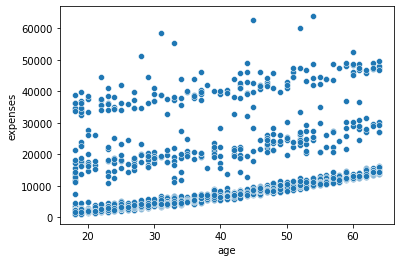

In [6]:
sns.scatterplot(data=ins,x='age',y='expenses')

In [7]:
ins.select_dtypes(object)

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [8]:
print(ins.sex.unique())
print(ins.smoker.unique())
print(ins.region.unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ins.sex=le.fit_transform(ins.sex)
ins.smoker=le.fit_transform(ins.smoker)

In [16]:
x=pd.get_dummies(ins.region)
x.head(2)

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0


In [17]:
ins_new=pd.concat([ins,x],axis=1)
ins_new.head(3)

,age,sex,bmi,children,smoker,region,expenses,northeast,northwest,southeast,southwest
0,19,0,27.9,0,1,southwest,16884.92,0,0,0,1
1,18,1,33.8,1,0,southeast,1725.55,0,0,1,0
2,28,1,33.0,3,0,southeast,4449.46,0,0,1,0


In [18]:
ins_new.drop('region',axis=1,inplace=True)

In [19]:
ins_new.head(3)

,age,sex,bmi,children,smoker,expenses,northeast,northwest,southeast,southwest
0,19,0,27.9,0,1,16884.92,0,0,0,1
1,18,1,33.8,1,0,1725.55,0,0,1,0
2,28,1,33.0,3,0,4449.46,0,0,1,0


In [54]:
X=ins_new.drop('expenses',axis=1)
Y=ins_new.expenses

In [22]:
from sklearn.model_selection import train_test_split
x1,x2,y1,y2=train_test_split(X,Y,
test_size=0.2,
random_state=20)

In [24]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x2, y2)

LinearRegression()

In [26]:
model.score(x2, y2)*100

80.77364936100982

In [30]:
X.head(3)


,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,19,0,27.9,0,1,0,0,0,1
1,18,1,33.8,1,0,0,0,1,0
2,28,1,33.0,3,0,0,0,1,0


In [38]:
new_arr=[19,1,25,0,1,0,0,1,0]
new_arr=np.array(new_arr).reshape(1,-1)
model.predict(new_arr)

c:\Users\Anirudh PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([22635.98780395])

In [55]:
# Scaling.
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)


In [56]:
X.mean()

-6.107056398535988e-17

In [57]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
X_train_mms=mms.fit_transform(x1)
X_test_mms=mms.transform(x2)

In [59]:
# Day 3 morning session 2
dia=pd.read_csv('DataSets/diabetes.csv')
print("Loaded diabetes csv")

Loaded diabetes csv


In [70]:
dia.head(2)
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [62]:
dia.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [65]:
dia.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

<Axes: xlabel='Glucose', ylabel='Outcome'>

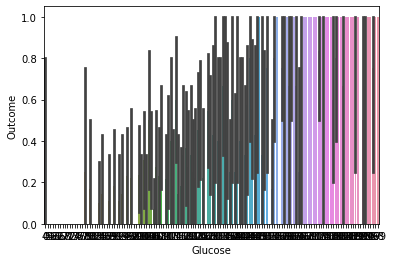

In [69]:
sns.barplot(dia,x='Glucose',y='Outcome')

In [71]:
dia.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [72]:
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: >

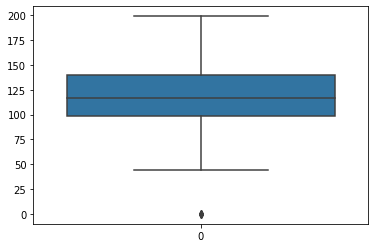

In [81]:
sns.boxplot(dia.Glucose)